In [181]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [182]:
df = pd.read_csv('AviationData.csv', header=0, encoding='cp1252',dtype=str) #'cp1252' encoding becuase of some ascii values 

In [183]:
df.columns = df.columns.str.replace('.', ' ') # Change '.' in column names to ' '
df.columns = df.columns.str.title() # Change to title case
df.rename(columns={'Far Description': 'FAR Description', 'Event Id': 'Event ID'}, inplace = True) # Deal with the exceptions (ID, FAR)
pd.set_option('display.max_columns', 100) # Set max display width to 100
df.head() 
df

,Event ID,Investigation Type,Accident Number,Event Date,Location,Country,Latitude,Longitude,Airport Code,Airport Name,Injury Severity,Aircraft Damage,Aircraft Category,Registration Number,Make,Model,Amateur Built,Number Of Engines,Engine Type,FAR Description,Schedule,Purpose Of Flight,Air Carrier,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Broad Phase Of Flight,Report Status,Publication Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,NC6404,Stinson,108-3,No,1,Reciprocating,NaN,NaN,Personal,NaN,2,0,0,0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Fatal(4),Destroyed,NaN,N5069P,Piper,PA24-180,No,1,Reciprocating,NaN,NaN,Personal,NaN,4,0,0,0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,Fatal(3),Destroyed,NaN,N5142R,Cessna,172M,No,1,Reciprocating,NaN,NaN,Personal,NaN,3,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Fatal(2),Destroyed,NaN,N1168J,Rockwell,112,No,1,Reciprocating,NaN,NaN,Personal,NaN,2,0,0,0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,Fatal(1),Destroyed,NaN,N15NY,Cessna,501,No,NaN,NaN,NaN,NaN,Personal,NaN,1,2,NaN,0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,Minor,NaN,NaN,N1867H,PIPER,PA-28-151,No,NaN,NaN,091,NaN,Personal,NaN,0,1,0,0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N2895Z,BELLANCA,7ECA,No,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,Non-Fatal,Substantial,Airplane,N749PJ,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,1,NaN,091,NaN,Personal,NaN,0,0,0,1,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N210CU,CESSNA,210N,No,NaN,NaN,091,NaN,Personal,MC CESSNA 210N LLC,0,0,0,0,NaN,NaN,NaN,NaN


In [184]:
#df.isnull().sum().sort_values(ascending = False) # Ranked missing data

In [185]:
cols_to_drop = ['Schedule','FAR Description','Longitude','Latitude','Airport Code',
                'Airport Name','Location','Publication Date','Air Carrier','Registration Number','Country',
                'Location','Investigation Type','Accident Number','Event ID','Purpose Of Flight']

df = df.drop(cols_to_drop, axis = 1) # Columns we don't need

In [186]:
df = df[df['Amateur Built'] == "No"] # Remove any amateur built aircraft

In [187]:
df = df.drop(['Amateur Built'], axis = 1) # Don't need it anymore

In [188]:
df.dropna(subset = ["Aircraft Category"],axis = 0, inplace = True ) # Remove any NaN aircraft categories

In [189]:
df.dropna(subset = ["Make"],axis = 0, inplace = True ) # Remove any NaN Makes

In [190]:
df = df[df['Aircraft Category'] == "Airplane"] # Remove anything that's not an airplane

In [191]:
df['Make'] = df['Make'].str.title() # CESSNA --> Cessna

In [192]:
df

,Event Date,Injury Severity,Aircraft Damage,Aircraft Category,Make,Model,Number Of Engines,Engine Type,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Broad Phase Of Flight,Report Status
5,1979-09-17,Non-Fatal,Substantial,Airplane,Mcdonnell Douglas,DC9,2,Turbo Fan,NaN,NaN,1,44,VMC,Climb,Probable Cause
7,1982-01-01,Non-Fatal,Substantial,Airplane,Cessna,140,1,Reciprocating,0,0,0,2,VMC,Takeoff,Probable Cause
8,1982-01-01,Non-Fatal,Substantial,Airplane,Cessna,401B,2,Reciprocating,0,0,0,2,IMC,Landing,Probable Cause
12,1982-01-02,Non-Fatal,Destroyed,Airplane,Bellanca,17-30A,1,Reciprocating,0,0,1,0,IMC,Cruise,Probable Cause
13,1982-01-02,Fatal(1),Destroyed,Airplane,Cessna,R172K,1,Reciprocating,1,0,0,0,IMC,Takeoff,Probable Cause
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88869,2022-12-13,Non-Fatal,Substantial,Airplane,Piper,PA42,2,NaN,0,0,0,1,NaN,NaN,NaN
88873,2022-12-14,Non-Fatal,Substantial,Airplane,Cirrus Design Corp,SR22,1,NaN,0,0,0,1,VMC,NaN,NaN
88876,2022-12-15,Non-Fatal,Substantial,Airplane,Swearingen,SA226TC,2,NaN,0,0,0,1,NaN,NaN,NaN
88877,2022-12-16,Minor,Substantial,Airplane,Cessna,R172K,1,NaN,0,1,0,0,VMC,NaN,NaN


<BarContainer object of 7 artists>

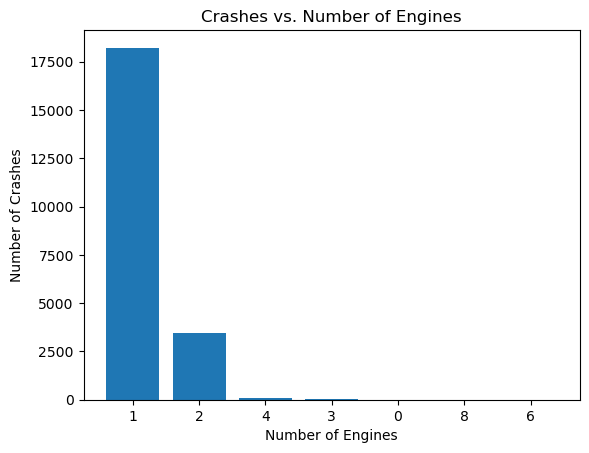

In [193]:
number_of_engines = df["Number Of Engines"].value_counts()
plt.xlabel("Number of Engines")
plt.ylabel("Number of Crashes")
plt.title("Crashes vs. Number of Engines")
plt.bar(number_of_engines.index,number_of_engines.values)

<BarContainer object of 10 artists>

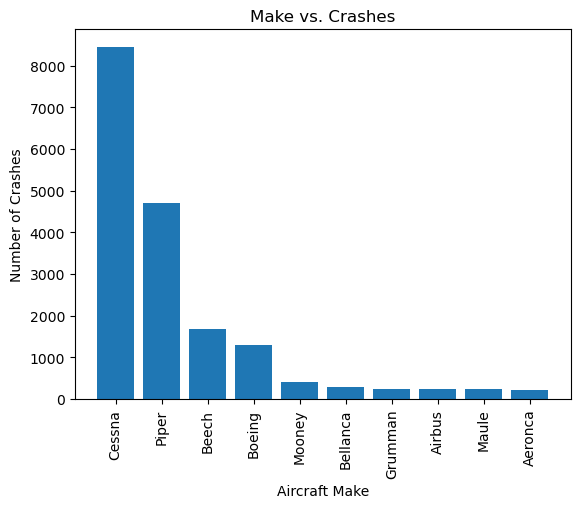

In [206]:
make_counts = df["Make"].value_counts()
plt.xlabel("Aircraft Make")
plt.ylabel("Number of Crashes")
plt.title("Make vs. Crashes")
plt.tick_params(axis='x', labelrotation=90)
plt.bar(make_counts.index[:10],make_counts.values[:10])

<BarContainer object of 20 artists>

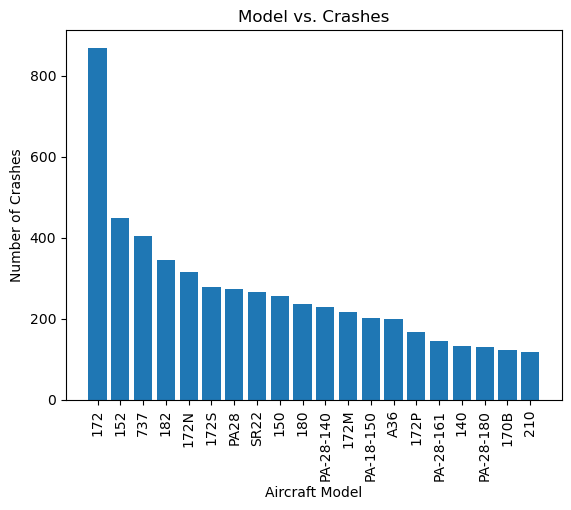

In [209]:
make_counts = df["Model"].value_counts()
plt.xlabel("Aircraft Model")
plt.ylabel("Number of Crashes")
plt.title("Model vs. Crashes")
plt.tick_params(axis='x', labelrotation=90)
plt.bar(make_counts.index[:20],make_counts.values[:20])